# Utilities codes

In [1]:
def describe(table,include='all',showNullIndexes=False):
    import numpy as np
    print table.describe(include=include)
    print "\n-> Has Nil? (How many?)"
    has_nil = table.isnull().apply(np.sum)
    print has_nil
    if showNullIndexes:
        for c in has_nil.index:
            if not has_nil[c]: continue
            print "\n-> Indexes where column '{}' is null:".format(c)
            print table[table[c].isnull()].index.values

# Plotting codes

This first cell(s) is(are) dedicated to place the codes used throught the notebook.
Reason for that is just organization and clarity.

In [2]:
import matplotlib
class PlotDistro:
    @staticmethod
    def boxhist(data,column,**kw):
        from matplotlib import pyplot as plt
        fig,axs = plt.subplots(1,2)
        fig.set_size_inches(15,5)
        
        data[column].plot.box(ax=axs[0])

        bins = kw['bins'] if kw.has_key('bins') else 10
        log = kw['log'] if kw.has_key('log') else False
        data[column].plot.hist(ax=axs[1],bins=bins,log=log)
        
        return plt

In [3]:
import numpy

def histogram2stepfunction(hist,bins):
    hist = hist.tolist()
    hh = hist+hist
    hh[::2] = hist
    hh[1::2] = hist
    hist = hh[:]
    bins = bins.tolist()
    bb = bins[:-1]+bins[1:]
    bb.sort()
    bins = bb[:]
    assert len(hist)==len(bins)
    return hist,bins

class Distro:
    
    @staticmethod
    def binning(vector,nbins,xmin=None,xmax=None,spacing='linear'):
        """
        """
        import numpy as np
        spacing_function = {'linear' : np.linspace}

        if spacing is not 'linear':
            spacing = 'linear'

        xmin = vector.min() if xmin is None else xmin
        xmax = vector.max() if xmax is None else xmax
        nbins = 10 if not (nbins >= 1) else nbins

        bins = spacing_function[spacing](xmin,xmax,nbins)
        return bins

        
    @staticmethod
    def histogram(vector,bins):
        """
        """
        import numpy as np

        h,b = np.histogram(vector,bins=bins,normed=False)
        assert np.array_equal(b,bins)
        return h,b


In [4]:
class Colors:
    # From https://en.wikipedia.org/wiki/Web_colors
    rgb = {
        'blueish' :   ['#0000FF',
                       '#9933FF',
                       '#0066FF'],
        'greenish' :  ['#00FF00',
                       '#66CC00',
                       '#009900'],
        'redish' :    ['#FF0000',
                       '#993300',
                       '#FF6600'],
        'yellowish' : ['#FFFF00',
                       '#CCCC00',
                       '#999900']
    }
    mono = {
        'grayish' :   ['#000000'
                      '#808080'
                      '#FFFFFF']
    }
    #blue = blueish[0]
    #red = redish[0]
    #green = greenish[0]
    #yellow = yellowish[0]
    
    @classmethod
    def get_colors(this,N,mode='sparse'):
        """
        mode = sparse
        """
        mode = mode if mode is 'sparse' else 'sparse'
        from collections import OrderedDict
        if mode is 'sparse':
            groups = this.rgb.keys()
            groups.sort()
            color_groups = OrderedDict()
            for g in groups:
                color_groups[g] = this.rgb.get(g)[:]
            
        #TODO: make this selection better, probably objectfying each color group
        colors = []
        while len(colors)<N:
            for _g in color_groups.keys():
                try:
                    colors.append(color_groups[_g].pop(0))
                except IndexError,e:
                    raise IndexError,"You're asking me {0} colors, more than I have to offer.".format(N)
                if len(colors) == N:
                       break
        return colors

In [5]:
import bokeh
import numpy

class PlotHisto:
    
    @staticmethod
    def init_figure(tools = None,logscale=False):
        """
        """
        from bokeh.plotting import figure
        from bokeh.models.tools import  PanTool,\
                                        BoxZoomTool,\
                                        WheelZoomTool,\
                                        ResizeTool,\
                                        ResetTool,\
                                        HelpTool
        from bokeh.models.tools import  Tool
        TOOLS = [PanTool(),BoxZoomTool(),WheelZoomTool(),ResizeTool(),ResetTool(),HelpTool()]
        if tools:
            if not isinstance(tools,(list,tuple)):
                tools = [tools]
            for t in tools:
                if not issubclass(t.__class__,Tool):
                    continue
                TOOLS.append(t)
        #TOOLS = 'pan,box_zoom,wheel_zoom,crosshair,hover,resize,reset'
        y_type = 'log' if logscale else 'linear'
        fig = figure(tools=TOOLS,y_axis_type=y_type)
        return fig
        
    @staticmethod
    def bar(counts,bins,label,color,alpha=0.5,figure=None):
        """
        """
        bottoms = [0]*len(counts)
        figure = PlotHisto.bar_stacked(tops=counts,
                                       bottoms=bottoms,
                                       bins=bins,
                                       label=label,
                                       color=color,
                                       alpha=alpha,
                                       figure=figure)
        return figure
    
    @staticmethod
    def bar_stacked(tops,bottoms,bins,label,color,alpha=None,figure=None):
        """
        """
        figure = PlotHisto._bar(tops,bottoms,bins[:-1],bins[1:],
                               label,color,alpha=alpha,figure=figure)
        return figure
    
    @staticmethod
    def bar_adjacent(counts,lefts,rights,label,color,alpha=None,figure=None):
        """
        """
        bottoms = [0]*len(counts)
        figure = PlotHisto._bar(counts,bottoms,lefts,rights,
                               label,color,alpha=alpha,figure=figure)
        return figure
        
    @staticmethod
    def _bar(tops,bottoms,lefts,rights,label,color,alpha,figure):
        """
        """
        assert len(tops)==len(bottoms) or isinstance(bottoms,(int,float))
        assert len(lefts)==len(rights)

        if figure is None:
            figure = init_figure()
            
        figure.quad(top=tops,
                    bottom=bottoms,
                    left=lefts,
                    right=rights,
                    fill_color=color,fill_alpha=alpha,
                    legend=label)
        return figure
        
    @staticmethod
    def step(counts,bins,label,color,figure):
        """
        """
        _y,_x = histogram2stepfunction(counts,bins)
        figure.line(x=_x,
                    y=_y,
                    #line_color="#D95B43",line_width=2,
                    line_color=color,line_width=2,
                    legend='label')

        import numpy as np
        _x = np.diff(bins)/2+bins[:-1]
        figure.circle(x=_x,
                      y=_y,
                      #line_color="#D95B43",line_width=2,
                      line_color=color,line_width=2,
                      fill_color="white",fill_alpha=1,
                      size=9,
                      legend='label')
        return figure
    

    @staticmethod
    def multihist(df,column,groupby,nbins=10,mode='over',logscale=False):
        """
        mode = [over,stacked,adjacent]
        """
        from bokeh.models import CrosshairTool,HoverTool
        
        import numpy as np

        fig = PlotHisto.init_figure(tools=[CrosshairTool(),HoverTool()],logscale=logscale)

        label = column
        
        fig.select(CrosshairTool).dimensions = ['height']
        fig.select(HoverTool).mode = 'hline'
        label_tip = "{}: ".format(label)
        fig.select(HoverTool).tooltips = [(label_tip,"$x")]

        fig.xgrid.grid_line_color = None            #vgrid
        fig.ygrid.minor_grid_line_color = 'gray'    #hgrid
        fig.ygrid.minor_grid_line_alpha = 0.5
        fig.ygrid.minor_grid_line_dash = 'dashed'

        fig.yaxis.axis_label = 'Counts'
        fig.xaxis.axis_label = label
        
        bins = Distro.binning(df[column],nbins,spacing='linear')
        
        groups = df.groupby(groupby)
        ngroups = len(groups)
        colors = Colors.get_colors(ngroups)
        
        counts_last = [0]*(len(bins)-1)
        for i,grp_key in enumerate(groups.indices.keys()):
            _data = df.loc[groups.groups[grp_key],(column)]
            _counts,_bins = Distro.histogram(_data,bins)
            
            if mode is 'stacked':
                _counts = [ _counts[_i]+_bot for _i,_bot in enumerate(counts_last) ]
                fig = PlotHisto.bar_stacked(_counts,counts_last,_bins,str(i),colors[i],figure=fig)
                
            elif mode is 'adjacent':
                bins_left,bins_right = [],[]
                for _i in range(len(bins)-1):
                    _binsplit = np.linspace(bins[_i],bins[_i+1],ngroups+1)
                    bins_left.append(_binsplit[i])
                    bins_right.append(_binsplit[i+1])
                fig = PlotHisto.bar_adjacent(_counts,bins_left,bins_right,str(i),colors[i],figure=fig)

            else:
                fig = PlotHisto.bar(_counts,bins,str(i),colors[i],alpha=float(1)/ngroups,figure=fig)
            last_counts = _counts[:]
            #else:
            #    _data = df.loc[grp.groups[grp_key],(column)]
            #    _counts,_bins = Distro.histogram(_data,bins)
            #    fig = PlotHisto.step(_counts,bins,i,fig)
        
        return fig


In [6]:
class PlotBox:
    
    @staticmethod
    def boxplot(df,column,by,mean=True):
        """
        """
        from bokeh.plotting import figure
        from bokeh.models import Range1d
        
        if mean:
            df['mean'] = df.groupby(by)[column].transform(lambda x:x-x.mean())
        groups = df.groupby(by)
        if mean:
            groups = groups['mean']
        else:
            groups = groups[column]

        # Now a 'try' statement because I don't want to get in to the details when I'm not using Pandas.Categories.
        try:
            # When the 'by' argument is a DF.Categorical instance, we have to do some transforming.
            # Notice that this Categorical (group) labels are strings containing the range of each bin,
            #  so that we get from them the "left,right" values for the 'bins' to use.
            import re
            _bins = set([ re.sub(r'[^\d.]+','',s) for c in df[by].values.categories for s in c.split(',') ])
            _bins = list(_bins)
            _bins.sort()
            _bins = np.asarray(_bins,dtype=np.float)
        except:
            # Now, when I am not using Categories. In particular, now I'm passing "by" as a vector/Series
            # containing numerical labels
            assert False
        _diff = np.diff(_bins)
        _center = _bins[:-1] + _diff/2

        # Generate some synthetic time series for six different categories
        cats = [ s for s,g in groups ]

        # Find the quartiles and IQR foor each category
        q1 = groups.quantile(q=0.25)
        q2 = groups.quantile(q=0.5)
        q3 = groups.quantile(q=0.75)
        iqr = q3 - q1
        upper = q3 + 1.5*iqr
        lower = q1 - 1.5*iqr

        # find the outliers for each category
        def outliers(group):
            cat = group.name
            return group[(group > upper.loc[cat][0]) | (group < lower.loc[cat][0])]
        out = groups.apply(outliers).dropna()

        # Prepare outlier data for plotting, we need coordinate for every outlier.
        outx = []
        outy = []
        for i,cat in enumerate(cats):
            # only add outliers if they exist
            if not out.loc[cat].empty:
                for value in out[cat]:
                    outx.append(_center[i])
                    outy.append(value)

        p = figure(title="")

        from bokeh.models import FixedTicker
        p.x_range = Range1d(_bins.min(),_bins.max())
        p.xaxis.ticker = FixedTicker(ticks=_center)

        # If no outliers, shrink lengths of stems to be no longer than the minimums or maximums
        qmin = groups.quantile(q=0.00)
        qmax = groups.quantile(q=1.00)
        upper = [ min([x,y]) for (x,y) in zip(qmax,upper) ]
        lower = [ max([x,y]) for (x,y) in zip(qmin,lower) ]

        # stems
        p.segment(_center, upper, _center, q3, line_width=2, line_color="black")
        p.segment(_center, lower, _center, q1, line_width=2, line_color="black")

        # boxes
        p.rect(_center, (q3+q2)/2, _diff/2, q3-q2,    fill_color="#E08E79", line_width=2, line_color="black")
        p.rect(_center, (q2+q1)/2, _diff/2, q2-q1,    fill_color="#3B8686", line_width=2, line_color="black")

        # whiskers (almost-0 height rects simpler than segments)
        p.rect(_center, lower, _diff/4, 0.002, line_color="black")
        p.rect(_center, upper, _diff/4, 0.002, line_color="black")

        # outliers
        p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

        p.xgrid.grid_line_color = None
        p.ygrid.minor_grid_line_color = 'gray'
        p.ygrid.minor_grid_line_alpha = 0.5
        p.ygrid.minor_grid_line_dash = 'dashed'

        p.xaxis.major_label_text_font_size="12pt"
        p.xaxis.major_label_orientation = -3.14/2

        p.xaxis.axis_label = by
        p.yaxis.axis_label = column if not mean else column + ' (0-mean)'

        return p


# 2dF zcat overview

The catalog we're going to play here is the "best.observations.idz" spectroscopic catalogue.

Before proceeding, let me quote the [website's ASCII catalogues section](http://magnum.anu.edu.au/~TDFgg/):
_"These ASCII catalogues are provided for the convenience of users of the 2dFGRS Final Data Release. However it is important to note that the [mSQL database](http://magnum.anu.edu.au/~TDFgg/Public/Release/Database/index.shtml) is the definitive data source, and contains all the information in the ASCII catalogues and much additional data."_

That said, we can go to the data...ok, not so soon. We have to deal with the (ascii) catalogue and its columns format first. The `best.observation.idz` columns [description](http://magnum.anu.edu.au/~TDFgg/Public/Release/SpecCat/speccat.html) summary is the following:
```
#name     type    description
serial    I6      Database serial number (=SEQNUM)
spectra   I1      Number of spectra obtained
name      A10     2dFGRS name (=NAME)
UKST      A3      UKST plate (=IFIELD)
ra        A11     R.A. (B1950)
dec       A11     Dec. (B1950)
ra2000    A11     R.A. (J2000)
dec2000   A11     Dec. (J2000)
BJG       F6.3    Final bj magnitude without extinction correction
BJSEL     F6.3    Final bj magnitude with extinction correction
BJG_OLD   F6.3    Original bj magnitude without extinction correction
BJSELOLD  F6.3    Original bj magnitude with extinction correction
GALEXT    F5.3    Galactic extinction value
SB_BJ     F6.3    SuperCosmos bj magnitude without extinction correction
SR_R      F6.3    SuperCosmos R magnitude without extinction correction
z         F9.6    Best redshift (observed)
z_helio   F9.6    Best redshift (heliocentric)
obsrun    A5      Observation run of best spectrum
quality   I1      Redshift quality parameter for best spectrum (reliable redshifts have quality>=3)
abemma    I1      Redshift type (abs=1, emi=2, man=3)
Z_ABS     F9.6    Cross-correlation redshift from best spectrum
KBESTR    I1      Cross-correlation template from best spectrum
R_CRCOR   F5.3    Cross-correlation R value from best spectrum
Z_EMI     F9.6    Emission redshift from best spectrum
NMBEST    I2      Number of emission lines for Z_EMI from best spectrum
SNR       F6.2    Median S/N per pixel from best spectrum
ETA_TYPE  F10.6   Eta spectral type parameter from best spectrum (-99.9 if none)
```
The catalogue (data file) itself has no header (i.e, column names).

So, after adding the column names header line, fixing the positional (ra*,dec*) columns (before: _hh mm ss_, after: _hh:mm:ss_) and subsituting the whitespaces to semicolons we have the new version of the catalogue, named `best.observations.idz.csv`, which the first 5 lines -- 2 header, 3 data -- are the following:
```
#I6;I1;A10;A3;A11;A11;A11;A11;F6.3;F6.3;F6.3;F6.3;F5.3;F6.3;F6.3;F9.6;F9.6;A5;I1;I1;F9.6;I1;F5.3;F9.6;I2;F6.2;F10.6
serial;spectra;name;UKST;ra;dec;ra2000;dec2000;BJG;BJSEL;BJG_OLD;BJSELOLD;GALEXT;SB_BJ;SR_R;z;z_helio;obsrun;quality;abemma;Z_ABS;KBESTR;R_CRCOR;Z_EMI;NMBEST;SNR;ETA_TYPE
1;2;TGS436Z001;349;00:11:55.72;-32:32:55.2;00:14:27.05;-32:16:14.6;19.424;19.362;19.430;19.390;0.062;19.368;18.286;0.2981;0.2981;01SEP;4;1;0.2981;5;4.5700;0.2984;1;3.8;-99.90000
2;1;TGS496Z001;349;00:11:59.29;-33:14:41.3;00:14:30.55;-32:58:00.7;18.842;18.789;18.870;18.840;0.053;18.688;17.291;0.1229;0.1228;01OCT;5;1;0.1229;1;14.3800;-9.9990;0;47.6;-2.58920
3;1;TGS435Z001;349;00:11:49.37;-32:39:57.4;00:14:20.71;-32:23:16.8;18.320;18.265;18.350;18.310;0.055;18.336;17.138;0.1038;0.1038;01SEP;4;1;0.1038;1;9.3800;0.1032;1;28.4;-2.46500
```
This is the file we are going to deal now.

In [7]:
# The reading of this catalogue could be done either using Pandas or Astropy.
# To have some homogeneity (looking into the future) let's do it with Astropy.
import astropy
from astropy.io import ascii
tab = ascii.read('best.observations.idz.csv',
                 format='csv', delimiter=';',
                 header_start=1)

In [8]:
# Summary
tab.info

/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/astropy/table/column.py:268: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)
/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/astropy/table/info.py:94: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if np.all(info[name] == ''):


<Table length=245591>
  name    dtype 
-------- -------
  serial   int64
 spectra   int64
    name   str10
    UKST   int64
      ra   str11
     dec   str11
  ra2000   str11
 dec2000   str11
     BJG float64
   BJSEL float64
 BJG_OLD float64
BJSELOLD float64
  GALEXT float64
   SB_BJ float64
    SR_R float64
       z float64
 z_helio float64
  obsrun    str5
 quality   int64
  abemma   int64
   Z_ABS float64
  KBESTR   int64
 R_CRCOR float64
   Z_EMI float64
  NMBEST   int64
     SNR float64
ETA_TYPE float64

Since the info provided regards the columns and data types, let's see what Pandas gives to us.

In [9]:
import pandas
df = tab.to_pandas()

In [10]:
pandas.set_option('display.max_columns',25)
pandas.set_option('display.width',1000)
df.describe()

,serial,spectra,UKST,BJG,BJSEL,BJG_OLD,BJSELOLD,GALEXT,SB_BJ,SR_R,z,z_helio,quality,abemma,Z_ABS,KBESTR,R_CRCOR,Z_EMI,NMBEST,SNR,ETA_TYPE
count,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.00000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000,245591.000000
mean,189248.420280,1.099132,570.171883,18.640340,18.532736,18.746687,18.668368,0.107604,18.625657,17.496698,-0.03712,-0.037142,4.027273,1.266260,0.000272,3.374509,6.403765,-1.494766,1.723813,15.747094,-21.349351
std,110943.954708,0.324562,215.249118,0.770491,0.773140,0.764504,0.763645,0.057304,0.955172,1.017280,1.16079,1.160787,0.795907,0.516379,1.041420,2.043343,3.778627,3.738832,1.384722,13.700003,41.108474
min,1.000000,1.000000,75.000000,13.558000,13.348000,14.050000,14.010000,0.004000,0.000000,0.000000,-9.00000,-9.000000,1.000000,1.000000,-9.999000,0.000000,-9.990000,-9.999000,0.000000,0.000000,-99.900000
25%,90888.500000,1.000000,410.000000,18.292000,18.182500,18.440000,18.360000,0.067000,18.282000,17.091000,0.06800,0.068000,4.000000,1.000000,0.063100,2.000000,3.890000,0.056900,1.000000,7.800000,-3.220400
50%,182547.000000,1.000000,476.000000,18.856000,18.748000,18.970000,18.900000,0.090000,18.853000,17.643000,0.10770,0.107700,4.000000,1.000000,0.106700,3.000000,5.670000,0.124500,1.000000,12.400000,-1.576600
75%,289966.500000,1.000000,791.000000,19.201000,19.095000,19.290000,19.220000,0.135000,19.205000,18.084000,0.14930,0.149300,5.000000,1.000000,0.149650,5.000000,8.340000,0.196200,2.000000,19.400000,0.921300
max,389712.000000,6.000000,892.000000,19.848000,19.613000,19.850000,19.500000,0.628000,21.286000,21.731000,3.50000,3.499900,5.000000,3.000000,0.349700,8.000000,39.820000,0.656800,7.000000,450.000000,72.892300


In [11]:
df.describe(include=['O'])

,name,ra,dec,ra2000,dec2000,obsrun
count,245591,245591,245591,245591,245591,245591
unique,245591,236954,215195,237939,215158,33
top,TGS491Z271,23:52:44.48,-01:46:34.0,12:17:37.59,-29:17:53.2,00SEP
freq,1,4,6,4,6,22396


## Positions: sexagesimal to degree

First of all, let's translate the sexagesimal positions to degree to have simpler quantities; ones that we can plot, for example.

In [12]:
class Coords:
    @staticmethod
    def sex2deg(ra,dec,frame='icrs'):
        from astropy.coordinates import SkyCoord
        from astropy import units
        c = SkyCoord(ra=ra, dec=dec,
                     unit=(units.hourangle,units.deg),
                     frame=frame)
        return c.ra.value,c.dec.value


In [13]:
# Since I am not interested on B1950 coordinates, I will just substitute those values with the J2000 in degrees

# First, though, let me copy the table
data = df.copy()

In [14]:
#data.ra,data.dec = Coords.sex2deg(data.ra2000,data.dec2000)

# And let me update the original(df) table with these values, just for the records ;)
#df.ra,df.dec = data.ra,data.dec


## Redshift and their flags

Let us see what are the properties of the (best) redshift distribution, and the relations with corresponding flags.

In [15]:
data = df[['z','quality','abemma']]
data.describe()

,z,quality,abemma
count,245591.00000,245591.000000,245591.000000
mean,-0.03712,4.027273,1.266260
std,1.16079,0.795907,0.516379
min,-9.00000,1.000000,1.000000
25%,0.06800,4.000000,1.000000
50%,0.10770,4.000000,1.000000
75%,0.14930,5.000000,1.000000
max,3.50000,5.000000,3.000000


In [16]:
%matplotlib inline

/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### The redshift _only_ distribution

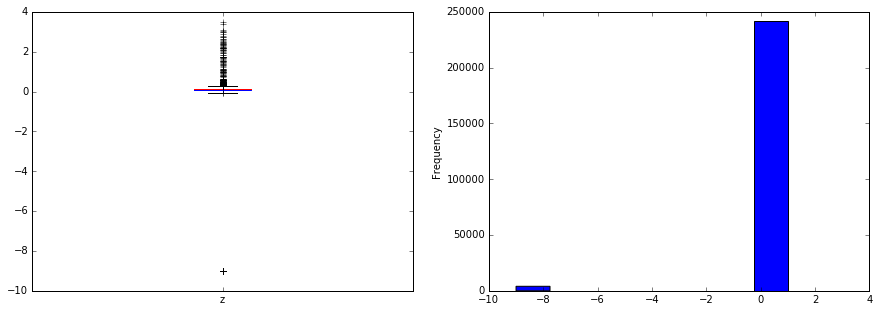

In [17]:
p = PlotDistro.boxhist(data,'z')

With the description summary and the plots above we see there are some "Null" values (i.e, "**-9**") in our data we were not aware of before (at least, I wasn't). Let's remove them by giving "None" to them.

In [18]:
_znil = data.z==-9
data.ix[_znil,'z'] = None

/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
data.describe()

,z,quality,abemma
count,241554.000000,245591.000000,245591.000000
mean,0.112673,4.027273,1.266260
std,0.070212,0.795907,0.516379
min,-0.087500,1.000000,1.000000
25%,0.070200,4.000000,1.000000
50%,0.108600,4.000000,1.000000
75%,0.150200,5.000000,1.000000
max,3.500000,5.000000,3.000000


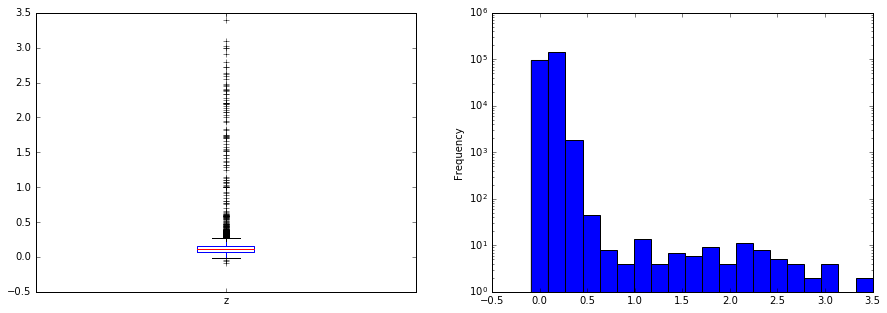

In [20]:
p = PlotDistro.boxhist(data,'z',bins=20,log=True)

### The redshift _vs_ flags distributions

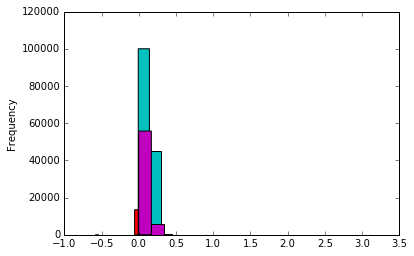

In [21]:
p = data.groupby('quality').z.plot.hist(bins=20,stacked=True)

#### [PLOT] A multi-distribution plot

Here we need to overplot multiple distributions. Let's define such plot function.

In [22]:
from bokeh.io import output_notebook, show, output_file
output_notebook()

Loading BokehJS ...

In [23]:
pq = PlotHisto.multihist(data,column='z',groupby='quality',nbins=30,mode='adjacent',logscale=True)
show(pq)

In [24]:
pa = PlotHisto.multihist(data,column='z',groupby='abemma',nbins=30,mode='adjacent',logscale=True)
show(pa)

### The redshift _vs_ magnitudes distribution

The _best_ catalog provides *bj* and *R* magnitudes, from the _SuperCosmos_[?]. There are also some other columns expressing different "versions" of magnitude *bj*:
```
BJG       :    Final bj magnitude without extinction correction
BJSEL     :    Final bj magnitude with extinction correction
BJG_OLD   :    Original bj magnitude without extinction correction
BJSELOLD  :    Original bj magnitude with extinction correction
GALEXT    :    Galactic extinction value
SB_BJ     :    SuperCosmos bj magnitude without extinction correction
SR_R      :    SuperCosmos R magnitude without extinction correction
```

For the time being -- since I don't really what are all does mags -- let me focus on `SB_BJ` and `SR_R`.

In [25]:
data['SB_BJ'] = df['SB_BJ']
data['SR_R'] = df['SR_R']
data.describe()

/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,z,quality,abemma,SB_BJ,SR_R
count,241554.000000,245591.000000,245591.000000,245591.000000,245591.000000
mean,0.112673,4.027273,1.266260,18.625657,17.496698
std,0.070212,0.795907,0.516379,0.955172,1.017280
min,-0.087500,1.000000,1.000000,0.000000,0.000000
25%,0.070200,4.000000,1.000000,18.282000,17.091000
50%,0.108600,4.000000,1.000000,18.853000,17.643000
75%,0.150200,5.000000,1.000000,19.205000,18.084000
max,3.500000,5.000000,3.000000,21.286000,21.731000


In [26]:
_nil = data.z==-9
print('Number of z == -9 entries: {}'.format(_nil.sum()))
#print 'Indexes where it is "-9":',np.where(_nil)
data.z[_nil] = None

/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/pandas/core/generic.py:4059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Number of z == -9 entries: 0


/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
_nil = data.SB_BJ==0
print('Number of SB_BJ == 0 entries: {}'.format(_nil.sum()))
#print 'Indexes where it is "-9":',np.where(_nil)
data.SB_BJ[_nil] = None

Number of SB_BJ == 0 entries: 218


/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
_nil = data.SR_R==0
print('Number of SR_R == 0 entries: {}'.format(_nil.sum()))
#print 'Indexes where it is "-9":',np.where(_nil)
data.SR_R[_nil] = None

Number of SR_R == 0 entries: 276


/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
describe(data,showNullIndexes=False)

                   z        quality         abemma          SB_BJ           SR_R
count  241554.000000  245591.000000  245591.000000  245373.000000  245315.000000
mean        0.112673       4.027273       1.266260      18.642205      17.516383
std         0.070212       0.795907       0.516379       0.777608       0.831389
min        -0.087500       1.000000       1.000000      12.193000      11.688000
25%         0.070200       4.000000       1.000000      18.284000      17.094000
50%         0.108600       4.000000       1.000000      18.853000      17.644000
75%         0.150200       5.000000       1.000000      19.205000      18.085000
max         3.500000       5.000000       3.000000      21.286000      21.731000

-> Has Nil? (How many?)
z          4037
quality       0
abemma        0
SB_BJ       218
SR_R        276
dtype: int64


In [30]:
nbins=20

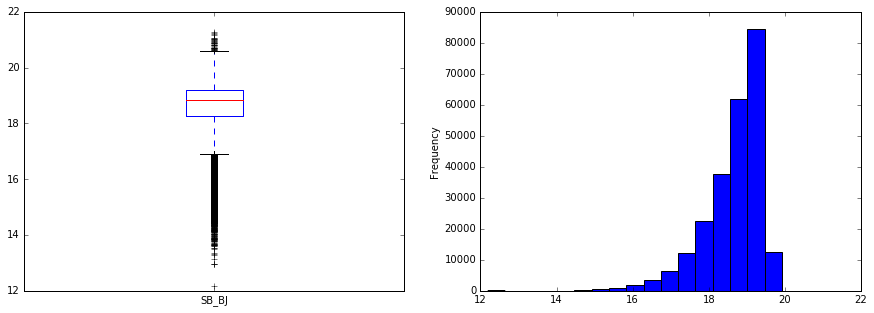

In [31]:
plt = PlotDistro.boxhist(data,column='SB_BJ',bins=nbins)

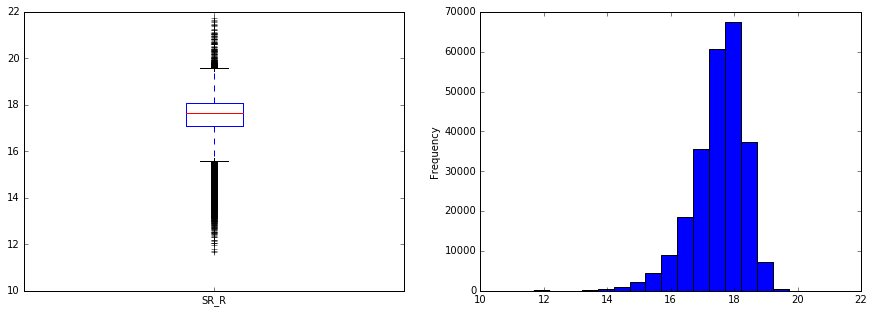

In [32]:
plt = PlotDistro.boxhist(data,column='SR_R',bins=20)

In [33]:
pbj = PlotHisto.multihist(data,column='SB_BJ',groupby='quality',mode='adjacent')
show(pbj)

In [34]:
pr = PlotHisto.multihist(data,column='SR_R',groupby='quality',mode='adjacent')
show(pr)

In [35]:
import pandas as pd
import numpy as np

mag_min = min(data['SR_R'].min(),data['SB_BJ'].min())
mag_max = max(data['SR_R'].max(),data['SB_BJ'].max())
mag_bins = np.linspace(mag_min,mag_max,nbins)

In [36]:
data['bins_SR'] = pd.cut(data['SR_R'],mag_bins)
p_boxplot_SR = PlotBox.boxplot(data,column='SR_R',by='bins_SR')

/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/pandas/core/generic.py:1517: FutureWarning: slice indexers when using iloc should be integers and not floating point
  result = self.iloc[loc]


In [37]:
data['bins_SB'] = pd.cut(data['SB_BJ'],mag_bins)
p_boxplot_SB = PlotBox.boxplot(data,column='SB_BJ',by='bins_SB')

/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/chbrandt/.conda/envs/photoz/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
def hist_compare(df,columns,bins,logscale=False):
    from bokeh.plotting import figure
    from bokeh.models import CrosshairTool,HoverTool
    
    TOOLS = 'pan,box_zoom,wheel_zoom,crosshair,hover,resize,reset'

    if logscale:
        p_hists = figure(tools=TOOLS,y_axis_type='log')
    else:
        p_hists = figure(tools=TOOLS)
    p_hists.xgrid.grid_line_color = None
    p_hists.ygrid.minor_grid_line_color = 'gray'
    p_hists.ygrid.minor_grid_line_alpha = 0.5
    p_hists.ygrid.minor_grid_line_dash = 'dashed'

    p_hists.select(CrosshairTool).dimensions = ['height']

    p_hists.select(HoverTool).mode = 'hline'
    p_hists.select(HoverTool).tooltips = [("mag: ","$x")]

    x_label = columns[0]
    y_label = columns[1]

    x = df[x_label]
    y = df[y_label]

    hs,b = np.histogram(x,bins=bins,normed=False)

    p_hists.quad(top=hs,
                   bottom=0,
                   left=bins[:-1],
                   right=bins[1:],
                   fill_color="#036564",fill_alpha=0.5,
                   legend=x_label)

    hp,b = np.histogram(y,bins=bins,normed=False)

    hh,bb = histogram2stepfunction(hp,b)

    p_hists.line(x=bb,
                   y=hh,
                   line_color="#D95B43",line_width=2,
                   legend=y_label)

    _b = np.diff(bins)/2+bins[:-1]
    p_hists.circle(x=_b,
                     y=hp,
                     size=9,line_color="#D95B43",line_width=2,
                     fill_color="white",fill_alpha=1,
                     legend=y_label)

    p_hists.yaxis.axis_label = 'Counts'

    return p_hists


In [39]:
p_hists = hist_compare(data,['SB_BJ','SR_R'],mag_bins,logscale=False)

In [40]:
p_hists.plot_height = 400

p_boxplot_SR.tools = p_hists.tools
p_boxplot_SR.x_range = p_hists.x_range
p_boxplot_SR.plot_height = p_hists.plot_height/2
p_boxplot_SR.xaxis.axis_label = None
p_boxplot_SR.ygrid.minor_grid_line_color = None

p_boxplot_SB.tools = p_hists.tools
p_boxplot_SB.x_range = p_hists.x_range
p_boxplot_SB.plot_height = p_hists.plot_height/2
p_boxplot_SB.xaxis.axis_label = None
p_boxplot_SB.ygrid.minor_grid_line_color = None

from bokeh.plotting import gridplot
p = gridplot([[p_hists],[p_boxplot_SB],[p_boxplot_SR]])
show(p)

In [41]:
from bokeh import mpl
data.boxplot(column='SB_BJ',by='quality')
show(mpl.to_bokeh())

In [42]:
from bokeh import mpl
data.boxplot(column='SR_R',by='quality')
show(mpl.to_bokeh())